In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read,write
from scipy.fftpack import *
import cv2

In [23]:
# extract audio from video

from moviepy.editor import *
clip = VideoFileClip("./data/video1.mp4")
audio = clip.audio.write_audiofile('./data/sample1.wav')

MoviePy - Writing audio in ./data/sample1.wav


MoviePy - Done.


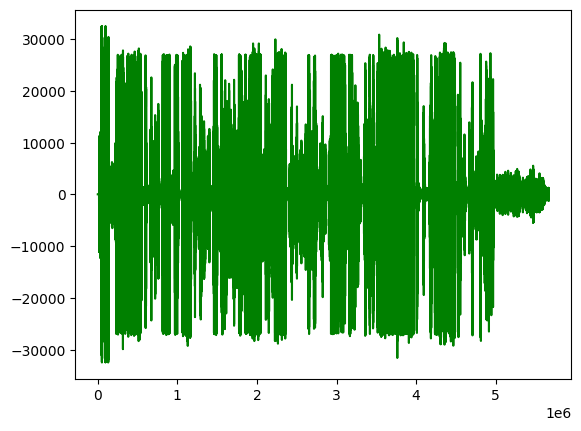

In [4]:
# we got a continuous wave graph for our audio file 

# video = cv2.VideoCapture("data/video.mp4")
# fps = video.get(cv2.CAP_PROP_FPS)     
# frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
# length = int(frame_count//fps) # seconds
sampleRate,original= read('data/src/sample.wav')
# # print(length,sampleRate)
# audio =  np.array([s[0] for s in audio])
# norm = np.int16((audio / audio.max()) * 32767)
# # norm = np.int16(audio)
# plt.rcParams["figure.autolayout"] = True
# # print(len(norm), (video.get(cv2.CAP_PROP_FRAME_COUNT)/fps)*sampleRate)
# plt.plot(norm)

audio = original.T[1]
# eightBit=[(ele/2**8.)*2-1 for ele in audio]
eightBit = audio
plt.plot(eightBit,'g')

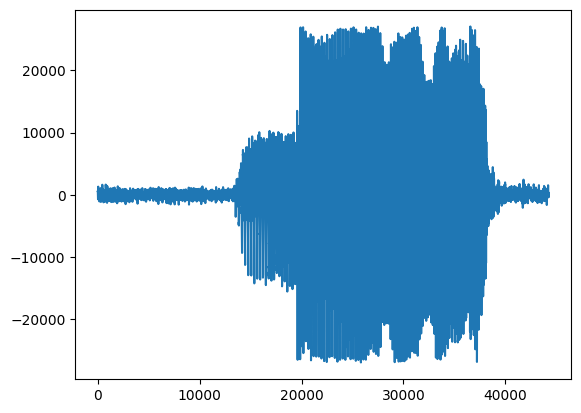

In [5]:
audio1 = audio[796590:840845]
plt.plot(audio1)

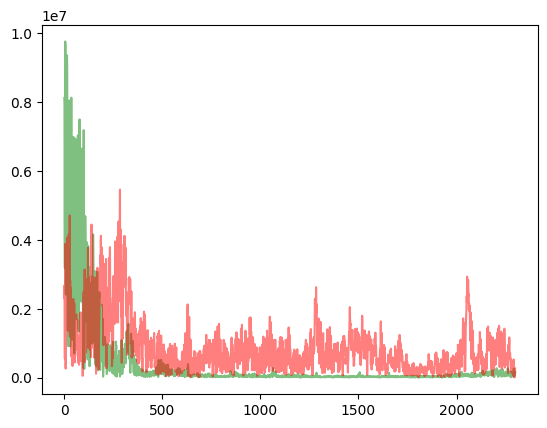

In [20]:
# fft from time domain to frequency domain

trans=fft(eightBit)
# print(len(trans)/128*19)
slice = fft(audio[796590:840845])/3
# plt.plot(abs(slice[500:(len(slice)//2-1)]),'g',alpha=0.5)

# print(len(trans)/128*16,len(trans)/128*17)
slice1 = fft(audio[708080:752335])
# plt.plot(abs(slice1[500:(len(slice1)//2-1)]),'b',alpha = 0.5)

plt.plot(abs(slice[700:3000]),'g',alpha=0.5)
plt.plot(abs(slice1[700:3000]),'r',alpha=0.5)

18.047504289236347 13531552.1046418
9.458951120285766 14556522.613471791
11.958818356117497 16865534.91048392


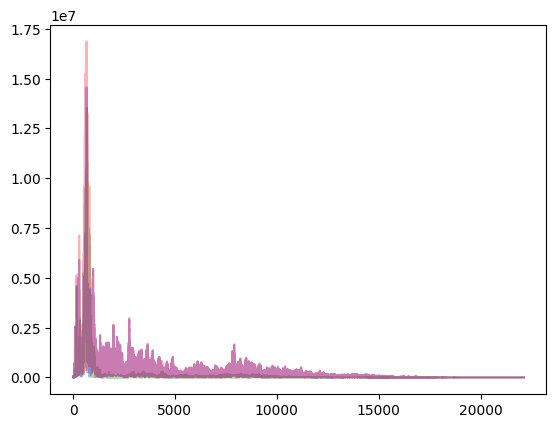

In [8]:
min1,max1 = min(abs(slice)),max(abs(slice))
min2,max2 = min(abs(slice1)), max(abs(slice1))

print(min1,max1)
print(min2,max2)

slice2 = slice+slice1

min3,max3 = min(abs(slice2)), max(abs(slice2))
print(min3,max3)

plt.plot(abs(slice[:(len(slice)//2-1)]),'g',alpha=0.3)
plt.plot(abs(slice1[:(len(slice1)//2-1)]),'b',alpha = 0.3)
plt.plot(abs(slice2[:(len(slice2)//2-1)]),'r',alpha = 0.3)


/tmp/ipykernel_6268/1438872320.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  write('./data/audio1.wav',sampleRate,ifft(slice[800:-800]).astype(audio.dtype))
/tmp/ipykernel_6268/1438872320.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  write('./data/audio2.wav',sampleRate,ifft(slice1[800:-800]).astype(audio.dtype))
/tmp/ipykernel_6268/1438872320.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  write('./data/audio3.wav',sampleRate,ifft(slice2).astype(audio.dtype))


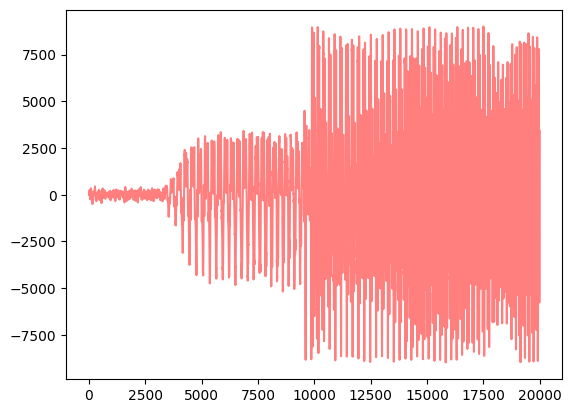

In [22]:
plt.plot(ifft(slice)[10000:30000],'r',alpha=0.5)
# plt.plot(audio[796590:840845],'g',alpha=0.5)
write('./data/audio1.wav',sampleRate,ifft(slice[800:-800]).astype(audio.dtype))
write('./data/audio2.wav',sampleRate,ifft(slice1[800:-800]).astype(audio.dtype))
write('./data/audio3.wav',sampleRate,ifft(slice2).astype(audio.dtype))